## Foundations of Data Mining: Assignment 2

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [1]:
# Please fill in your names here
NAME_STUDENT_1 = ""
NAME_STUDENT_2 = ""

In [2]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all" 
HTML('''<style>html, body{overflow: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

## Support Vector Bananas (4 points (2+2))
We will first explore SVM kernels and hyperparameters on an artificial dataset representing multiple banana shapes. 

In [5]:
from sklearn.model_selection import *
bananas = oml.datasets.get_dataset(1460) # Download banana data
X, y = bananas.get_data(target=bananas.default_target_attribute);
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1/4)

1 . Evaluate how well an SVM classifier can fit the data. 

- Use a linear, polynomial and radial basis function (RBF) kernel, using their default hyperparameters. Evaluate the performance of each kernel using the test set and AUC. Which one works best? 
- Visualize the results using the visualization code also used in class (under mglearn/plot_svm.py > plot_svm_kernels). Also show the AUC score and the number of support vectors. Explain intuitively how well the data is fitted, why the kernel is (not) able to fit the data, whether it is under- or overfitting, etc.

2 . Pick the RBF kernel and optimize the two most important hyperparameters (the $C$ parameter and the kernel width $\gamma$). 

- First, optimize manually using 3 values for each (a very small, default, and very large value). For each of the 9 combinations, create the same RBF plot as before, report the number of support vectors, and the AUC performance. Explain the performance results. When are you over/underfitting?
- Next, optimize the hyperparameters using a grid search and 10-fold cross validation. Show a heatmap of the results snd report the optimal hyperparameter values.
    - Hint: values for C and $\gamma$ are typically in [$2^{-15}..2^{15}$] on a log scale. Use at least 10 values for each.

## Building Kernels (4 points (0.5+0.5+1+2))

Consider the artificial dataset given below. It represents a sine wave with added noise.

1. Fit an SVM Regressor with the default RBF kernel, and plot the predictions on all data points in [0, 40]. 

    - Does it fit the data well? Does it extrapolate well (in the range [30,40])? Explain your findings. 
    
    Yes, in the range [0,30] the fit is quite good. The shape of the plot is not a perfect sinus but it does closely resemble one. However, in the range [30,40] 
    the fit bad, it is just a straight line which looks nowhere near a sinus.
        
    
    - Can you get better results by tweaking the kernel or the other SVM parameters?
    
    The linear, poly and sigmoid kernels all yielded poor fits. Furthermore, running a fit on the poly kernel took a long time to run, so the focus was shifted to optimizing other parameters
    using the rbf kernel. After varying gamma, a value of 0.5 which is sleightly lower than the 1 default improved the fit in the [0,30] range. Other values for C did not improve the fit.
    Adopting epsilon=0.01 lead to an almost perfect fit in the [0,20] range. None of the parameters improved the fit in the [30,40] range significantly.
    
2. Implement your own linear kernel. This is a function that takes 2 vectors (arrays) and returns the dot product:

      $$k(\mathbf{x}_i,\,\mathbf{x}_j) = \mathbf{x}_i \cdot \mathbf{x}_j$$
    - Build an SVM regressor using that kernel by passing your kernel function as the `kernel` hyperparameter. 
    - Fit it on the sine data and plot the predictions on all data points. Interpret the results.
    
    As expected, it tries to fit a straight line to a sine, which does not work well. The line is angled downwards slightly. This can be explained by the way X is generated.
    The sine starts at 0, but ends at -1. In the range [0-2] relatively many points are positive while in the range [28-30] points are negative.
    
3. Since this data is periodic, it makes sense to implement a periodic kernel instead. 

    - This is the Exponential Sine Squared kernel, with length scale $\Gamma$ and periodicity $P$:
  $$k(\mathbf{x}_i,\,\mathbf{x}_j) = \exp \left( -\Gamma\,\sin^2\left[\frac{\pi}{P}\,\left|\left|x_i-x_j\right|\right|\right]\right)$$
    - Implement it, using the defaults $\Gamma=1$, periodicity $P=1$, and Euclidean distance.  
        - Note: You may also use the slightly different version used in scikit-learn:
        
      $$k(\mathbf{x}_i,\,\mathbf{x}_j) = \exp \left( -2\,\left[\frac{\sin \left[\frac{\pi}{P}\,\left|\left|x_i-x_j\right|\right|\right]}{\Gamma}\right]^2\right)$$
      
    - Train an SVM regressor with it, fit in on the same data and plot the result. Interpret the outcome. 
    
    The fit function is somewhat sine shaped, but has a lower amplitude and a lower period than the sine that the fit should look like.
    
    - Think about what $\Gamma$ and $P$ represent. Can you improve the fit by manually adjusting them? Explain your findings.
    
    $P$ seems to influence the period of the function, while $\Gamma$ influences the amplitude. $\Gamma$ seems to be a measure of how much each sample influences the amplitude at a certain point.
    High values of $\Gamma$ seem to cause overfitting. $P$ could be adjusted to match the period of the input sine. Indeed, using a value of $2\pi$ yields almost a perfect fit of the sine for
    the entire [0:40] range with $\Gamma = 1$.
    
    - Optimize $\Gamma$ and periodicity $P$ (using `true_y` as the ground truth). Use a grid search or random search, $\Gamma \in [0,1]$, $P \in [1,100]$, try at least 5 values for each.

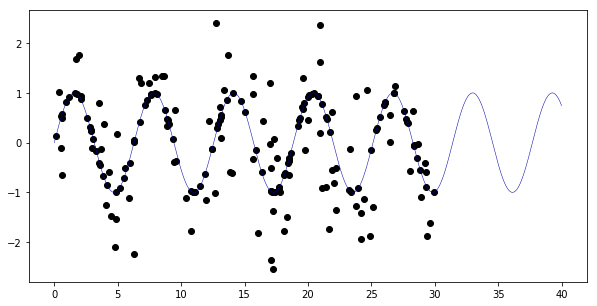

In [75]:
# Generate sample data
rng = np.random.RandomState(0) # Random seed, for reproducibility 
X = 30 * rng.rand(200, 1)
y = np.sin(X).ravel() 
y[::2] += rng.normal(scale = 1.0, size = X.shape[0] // 2) # adds noise

X_plot = np.linspace(0, 40, 10000)[:, None] # A larger range to evaluate on
true_y = np.sin(X_plot) # and the 'true' target function



plt.figure(figsize=(10, 5))
plt.scatter(X, y, c='k', label='Data')
plt.plot(X_plot, true_y);

r2 score:  0.6661655650918696


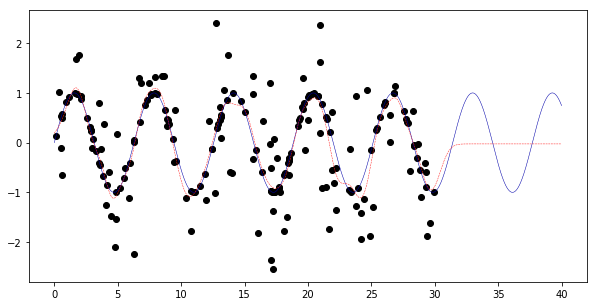

In [76]:
# assignment 2.1 - 2.3
from sklearn import svm


def ass1_1():
    svr_rbf = svm.SVR()    
    svr_rbf.fit(X,y)
    y_rbf = svr_rbf.predict(X_plot)

    '''
    print("Support vectors:")
    print(svr_rbf.support_vectors_[:])
    print("Coefficients:")
    print(svr_rbf.dual_coef_[:])
    '''

    y_rbf = svr_rbf.predict(X_plot)
    plt.figure(figsize=(10, 5))
    plt.scatter(X, y, c='k', label='Data')
    plt.plot(X_plot, true_y);
    #plt.plot(X[:40], y_rbf[:40]) #take first 40 elements - array[start:stop:step]
    plt.plot(X_plot, y_rbf) 
    print('r2 score: ',r2_score(y_rbf.reshape(-1, 1) , true_y))
    return

ass1_1()

start iteration
(154, 1)


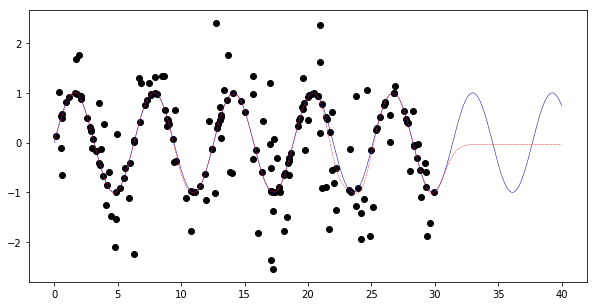

r2 score:  0.6978974489224424
done!


In [77]:
#assignment 1_1.2

from sklearn import svm


def ass1_1_2():
    C = 1.0  # SVM regularization parameter
    '''
    models = (svm.SVR(kernel='rbf', C=C, gamma=0.001 ),
                svm.SVR(kernel='rbf', C=C, gamma=0.01 ),
                svm.SVR(kernel='rbf', C=C, gamma=0.1 ),
                svm.SVR(kernel='rbf', C=C, gamma=0.5),
                svm.SVR(kernel='rbf', C=C, gamma=1),
                svm.SVR(kernel='rbf', C=C, gamma=10),
                svm.SVR(kernel='rbf', C=C, gamma=100),
                svm.SVR(kernel='rbf', C=C, gamma=1000),
             )
    '''
    models = (
                svm.SVR(kernel='rbf', C=C, gamma=0.5,epsilon=0.01, tol=1e-3),
             )
    
    models = (clf.fit(X, y) for clf in models)

    for clf in models:
        print("start iteration")

        y_rbf = clf.predict(X_plot)
        print(clf.support_vectors_[:].shape)
        
        plt.figure(figsize=(10, 5))
        plt.scatter(X, y, c='k', label='Data')
        plt.plot(X_plot, true_y);
        #plt.plot(X[:40], y_rbf[:40]) #take first 40 elements - array[start:stop:step]
        plt.plot(X_plot, y_rbf) 
        plt.show()
        print('r2 score: ',r2_score(y_rbf.reshape(-1, 1) , true_y))
    
    print("done!")
    return

ass1_1_2()


start iteration
(0, 0)


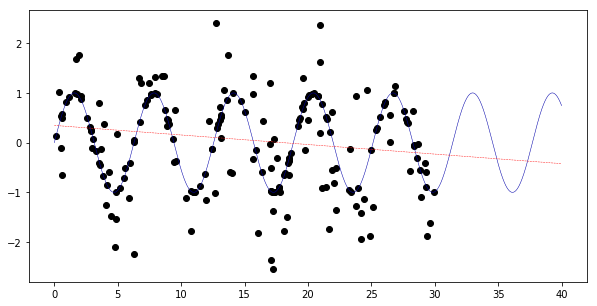

r2 score:  -10.249010765037541
done!


In [78]:
#assignment 1_2

from sklearn import svm

def custom_kernel(X, Y):
    return np.dot(X, Y.T)

def ass1_2():
    models = (
                svm.SVR(kernel=custom_kernel),
             )
    
    models = (clf.fit(X, y) for clf in models)

    for clf in models:
        print("start iteration")

        y_rbf = clf.predict(X_plot)
        print(clf.support_vectors_[:].shape)
        
        plt.figure(figsize=(10, 5))
        plt.scatter(X, y, c='k', label='Data')
        plt.plot(X_plot, true_y);
        #plt.plot(X[:40], y_rbf[:40]) #take first 40 elements - array[start:stop:step]
        plt.plot(X_plot, y_rbf) 
        plt.show()
        '''
        print("Support vectors:")
        print(clf.support_vectors_[:])
        print("Coefficients:")
        print(clf.dual_coef_[:])
        '''
        print('r2 score: ',r2_score(y_rbf.reshape(-1, 1) , true_y))
    
    print("done!")
    return

ass1_2()


start iteration
(0, 0)


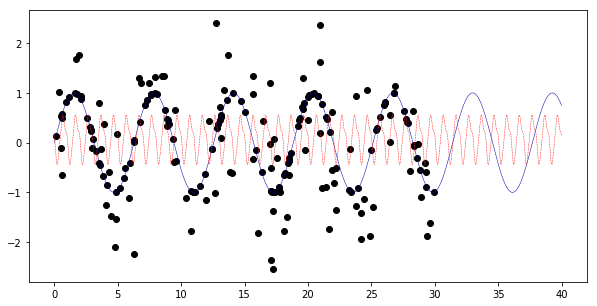

r2 score:  -5.031298277362999
start iteration
(0, 0)


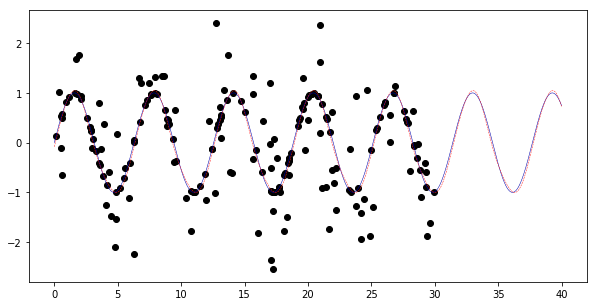

r2 score:  0.9927819921369551
done!


In [79]:
#assignment 1_3

from sklearn import svm

def build_custom_kernel(gamma,P):
    def custom_kernel(X, Y):
        abs = np.absolute(X-Y.T)    
        temp1 = (np.pi/P) * abs;    
        temp2 = np.power(np.sin(temp1),2);    
        result = np.exp(-gamma*temp2);    
    
        return result
    return custom_kernel

def ass1_2():
    models = (
                svm.SVR(kernel=build_custom_kernel(1,1)),
                svm.SVR(kernel=build_custom_kernel(1,np.pi*2)),
             )
    
    models = (clf.fit(X, y) for clf in models)

    for clf in models:
        print("start iteration")

        y_rbf = clf.predict(X_plot)
        print(clf.support_vectors_[:].shape)
        
        plt.figure(figsize=(10, 5))
        plt.scatter(X, y, c='k', label='Data')
        plt.plot(X_plot, true_y);
        #plt.plot(X[:40], y_rbf[:40]) #take first 40 elements - array[start:stop:step]
        plt.plot(X_plot, y_rbf) 
        plt.show()
        '''
        print("Support vectors:")
        print(clf.support_vectors_[:])
        print("Coefficients:")
        print(clf.dual_coef_[:])
        '''
    
        print('r2 score: ',r2_score(y_rbf.reshape(-1, 1) , true_y))
        
    print("done!")
    return

ass1_2()

Best params:
{'kernel': <function build_custom_kernel.<locals>.custom_kernel at 0x000001F0188539D8>}

Best score: -0.06550


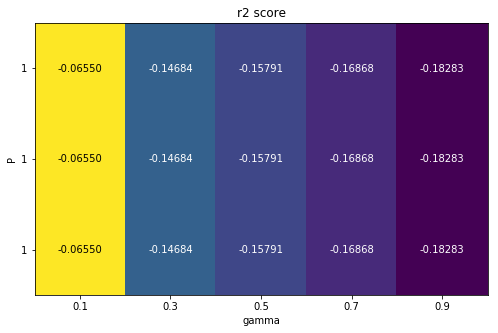

In [7]:
#assignment 1_3.grid
from sklearn import svm
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import make_scorer, r2_score

import inspect
import math




def build_custom_kernel(gamma,P):
    
    def custom_kernel(X, Y):
        abs = np.absolute(X-Y.T)    
        temp1 = (np.pi/P) * abs;    
        temp2 = np.power(np.sin(temp1),2);    
        result = np.exp(-gamma*temp2);    
        #print("P: {},gamma: {},".format(P,gamma))
        return result
    return custom_kernel


def my_scorer(estimator, y_true, y_predicted):
    global best_score
    
    y_pred = estimator.predict(X_plot) #predict on all X_plot values to be able to compare to true_y
    score = r2_score(true_y, y_pred)
        
    return score

def grid_1_3(regression, gridy, gridx, yticks, xticks, param_grid):    
    
    grid = GridSearchCV(regression, param_grid=param_grid, cv=2, n_jobs=1, scoring=my_scorer )    
    #print(regression.get_params().keys())    
    grid.fit(X, y)
    

    print("Best params:\n{}\n".format(grid.best_params_))
    print("Best score: {:.5f}".format(grid.best_score_))
    

    #print("Best score: {:.5f}".format(best_score))
   # print("Test-set score: {:.2f}".format(grid.score(y.reshape(-1, 1), true_y)))
    
    # convert to Dataframe
    results = pd.DataFrame(grid.cv_results_)

    scores = np.array(results.mean_test_score).reshape(gridy, gridx)
    
    # plot the mean cross-validation scores
    mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=xticks,
                      ylabel='P', yticklabels=yticks, cmap="viridis", fmt="%.5f");
    #plt.title("ElasticNet score")
    #plt.plot(10,10)
    #plt.figure(figsize=(1,1))
    plt.title('r2 score')
    plt.rcParams["figure.figsize"] = (20,5)
    plt.show() 
    return

#used to determine which axis is P, and which axis is gamma in plotted heatmap
def check_axis():
    grid_1_3(svm.SVR(), 3, 5, [1,1,1], [0.1,0.3,0.5,0.7,0.9], 
             {'kernel': [build_custom_kernel(0.1, 1), build_custom_kernel(0.3, 1), build_custom_kernel(0.5, 1), build_custom_kernel(0.7, 1), build_custom_kernel(0.9, 1), 
                        build_custom_kernel(0.1, 1), build_custom_kernel(0.3, 1), build_custom_kernel(0.5, 1), build_custom_kernel(0.7, 1), build_custom_kernel(0.9, 1), 
                        build_custom_kernel(0.1, 1), build_custom_kernel(0.3, 1), build_custom_kernel(0.5, 1), build_custom_kernel(0.7, 1), build_custom_kernel(0.9, 1),                     
    ]})
    return  
     
#optimize gamma and P for a wide range of values. takes about 2 minutes to run
def optimize_p_gamma():        

    grid_1_3(svm.SVR(), 11, 5, [1,4,5,6,'2pi',7,10,30,50,70,90], [0.1,0.3,0.5,0.7,0.9], 
             {'kernel': [build_custom_kernel(0.1, 1), build_custom_kernel(0.3, 1), build_custom_kernel(0.5, 1), build_custom_kernel(0.7, 1), build_custom_kernel(0.9, 1), 
                        build_custom_kernel(0.1, 4), build_custom_kernel(0.3, 4), build_custom_kernel(0.5, 4), build_custom_kernel(0.7, 4), build_custom_kernel(0.9, 4), 
                        build_custom_kernel(0.1, 5), build_custom_kernel(0.3, 5), build_custom_kernel(0.5, 5), build_custom_kernel(0.7, 5), build_custom_kernel(0.9, 5), 
                        build_custom_kernel(0.1, 6), build_custom_kernel(0.3, 6), build_custom_kernel(0.5, 6), build_custom_kernel(0.7, 6), build_custom_kernel(0.9, 6), 
                        build_custom_kernel(0.1, np.pi*2), build_custom_kernel(0.3, np.pi*2), build_custom_kernel(0.5, np.pi*2), 
                        build_custom_kernel(0.7, np.pi*2), build_custom_kernel(0.9, np.pi*2),
                        build_custom_kernel(0.1, 7), build_custom_kernel(0.3, 7), build_custom_kernel(0.5, 7), build_custom_kernel(0.7, 7), build_custom_kernel(0.9, 7),                                 
                        build_custom_kernel(0.1, 10), build_custom_kernel(0.3, 10), build_custom_kernel(0.5, 10), build_custom_kernel(0.7, 10), build_custom_kernel(0.9, 10), 
                        build_custom_kernel(0.1, 30), build_custom_kernel(0.3, 30), build_custom_kernel(0.5, 30), build_custom_kernel(0.7, 30), build_custom_kernel(0.9, 30), 
                        build_custom_kernel(0.1, 50), build_custom_kernel(0.3, 50), build_custom_kernel(0.5, 50), build_custom_kernel(0.7, 50), build_custom_kernel(0.9, 50), 
                        build_custom_kernel(0.1, 70), build_custom_kernel(0.3, 70), build_custom_kernel(0.5, 70), build_custom_kernel(0.7, 70), build_custom_kernel(0.9, 70),
                        build_custom_kernel(0.1, 90), build_custom_kernel(0.3, 90), build_custom_kernel(0.5, 90), build_custom_kernel(0.7, 90), build_custom_kernel(0.9, 90)
]}) 
    return
#optimize gamma with P=2pi                          
def optimize_gamma():
    
    grid_1_3(svm.SVR(), 1, 21, ['2pi'], [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1], 
        {'kernel': [build_custom_kernel(0, np.pi*2), build_custom_kernel(0.05, np.pi*2), build_custom_kernel(0.1, np.pi*2),build_custom_kernel(0.15, np.pi*2), 
                    build_custom_kernel(0.2, np.pi*2), build_custom_kernel(0.25, np.pi*2), build_custom_kernel(0.3, np.pi*2),build_custom_kernel(0.35, np.pi*2), 
                    build_custom_kernel(0.4, np.pi*2), build_custom_kernel(0.45, np.pi*2), build_custom_kernel(0.5, np.pi*2),build_custom_kernel(0.55, np.pi*2), 
                    build_custom_kernel(0.6, np.pi*2), build_custom_kernel(0.65, np.pi*2), build_custom_kernel(0.7, np.pi*2),build_custom_kernel(0.75, np.pi*2), 
                    build_custom_kernel(0.8, np.pi*2), build_custom_kernel(0.85, np.pi*2), build_custom_kernel(0.9, np.pi*2),build_custom_kernel(0.95, np.pi*2), 
                    build_custom_kernel(1, np.pi*2)
    ]}) 
    return

check_axis() # runtime: a few seconds
#optimize_p_gamma() # runtime: 2 minutes

#optimize_gamma() # runtime: 30 secondes


4 . We now make the problem a bit more challenging by adding an upward trend:

- Fit the same SVM using the optimal parameters from the previous subtask and plot the results. Do they still work? Explain what you see.
No, the custom kernel tries to fit a sinus without trend so as expected the fit is far off.

- Fit a Gaussian process (GP) using the kernels given below. First use the singular ExpSineSquared kernel (the implementation provided by sklearn this time), then build a new kernel consisting of the 3 components given below. Use both to predict all points for the "rising noisy sine" data and plot the results as usual. Interpret the results.
    - For the GP, it may help to use `normalize_y=True` since the y-values are not around 0. Setting `alpha=0.1` may help with possible numerical issues, otherwise keep it at 0.
    
    Doing this with alpha=0 and without normalization does not yield any proper fits, k1,k2 and k3 only yield straight lines. Using normalization brings this line closer to the data points but does not alter the shape of the line. Setting alpha to 0.1 makes a big difference, with k2 and k3 now fitting the sine quite well in the [0-30] range
- Also plot the _uncertainty interval_ around the predictions. You can ask the GP to return the standard deviation during prediction with the `return_std=True` hyperparameter. Plot a band 2 standard deviations above and below the prediction. You can use MatPlotLib's `fill_between` as shown in class.
    - You can combine the 3 models in one plot for easy comparison.
    
    We decided to use seperate plots as the difference between k2 and k3 would otherwise be hard to spot.
    
- We've provided reasonable values for the kernel hyperparameters above. Can you optimize them further to get an even better fit? Think about what the hyperparameters do and optimize the ones you think are most worth tuning.

for k2 and k3 the hyperparameters are already tuned quite well in the [0-30] range. To get a good result in the [30-40] range as well simple_kernel with a periodicity of 2pi was combined with the upward trend of k1. This yielded a nice fit, which could be improved further by optimizing k1 to not skew off in the [30-40] range.

start iteration
(0, 0)


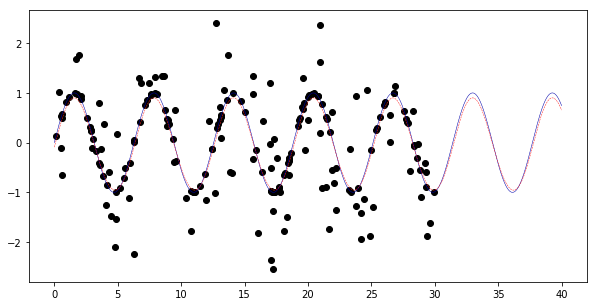

0.9255546968995148
done!


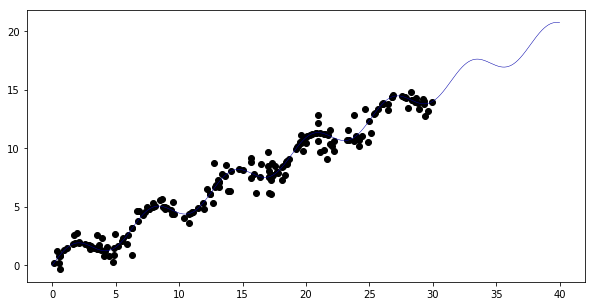

In [80]:
# Generate sample data with added trend
rng = np.random.RandomState(0)
X = 30 * rng.rand(200, 1)
y = X.ravel()/2 + np.sin(X).ravel()
y[::2] += rng.normal(scale = 1.0, size = X.shape[0] // 2)  # add noise

X_plot = np.linspace(0, 40, 10000)[:, None]
true_y = X_plot/2 + np.sin(X_plot)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, c='k', label='Data')
plt.plot(X_plot, true_y);

start iteration
(0, 0)


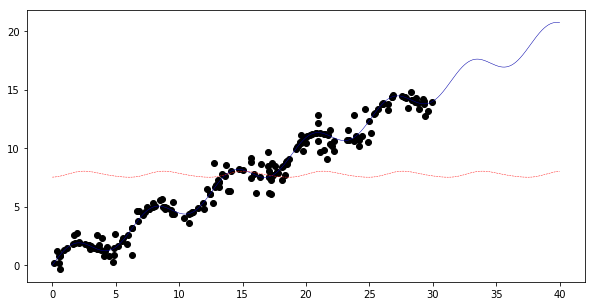

r2 score:  -1195.2080381292437
done!


In [81]:
#assignment 1_4

from sklearn import svm

def build_custom_kernel(gamma,P):
    def custom_kernel(X, Y):
        abs = np.absolute(X-Y.T)    
        temp1 = (np.pi/P) * abs;    
        temp2 = np.power(np.sin(temp1),2);    
        result = np.exp(-gamma*temp2);    
    
        return result
    return custom_kernel

def ass1_4():
    models = (svm.SVR(kernel=build_custom_kernel(0.2,np.pi*2)),
             )
    
    models = (clf.fit(X, y) for clf in models)

    for clf in models:
        print("start iteration")

        y_rbf = clf.predict(X_plot)
        print(clf.support_vectors_[:].shape)
        
        plt.figure(figsize=(10, 5))
        plt.scatter(X, y, c='k', label='Data')
        plt.plot(X_plot, true_y);
        #plt.plot(X[:40], y_rbf[:40]) #take first 40 elements - array[start:stop:step]
        plt.plot(X_plot, y_rbf) 
        plt.show()
        '''
        print("Support vectors:")
        print(clf.support_vectors_[:])
        print("Coefficients:")
        print(clf.dual_coef_[:])
        '''
    
        print('r2 score: ',r2_score(y_rbf.reshape(-1, 1) , true_y))
        
    print("done!")
    return

ass1_4()

In [82]:
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared, RBF

# Replace `length_scale` and `periodicity` with the values found in the previous part.
kernel_simple = ExpSineSquared(length_scale=1, periodicity=1) # periodic component
kernel_simple2 = ExpSineSquared(length_scale=1, periodicity=2*np.pi) # periodic component, matching original sine

k1 = 4300 * RBF(length_scale=70.0)  # long term smooth rising trend
k2 = 6 * RBF(length_scale=90.0) * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # periodic component
k3 = 0.03 * RBF(length_scale=0.134) + WhiteKernel(noise_level=0.035)  # noise terms

kernel_simple_k1 = k1 * kernel_simple2 #combine k1 with kernel_simple2

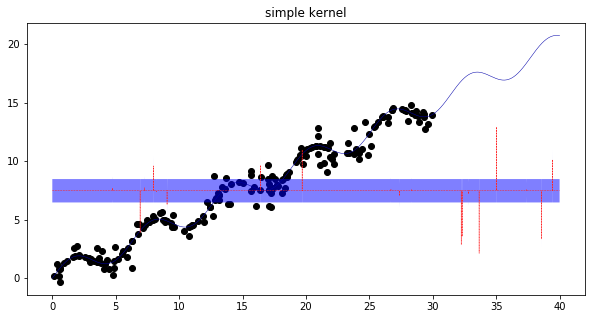

r2 score:  -2594.188310349236


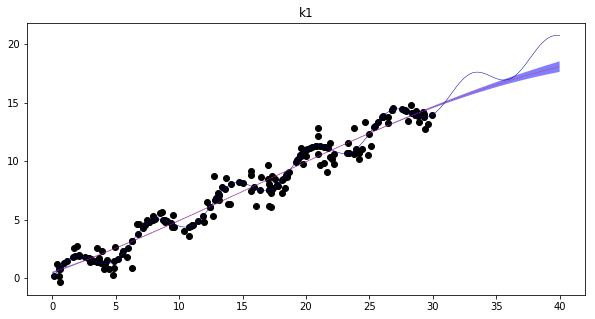

r2 score:  0.9693294861911929


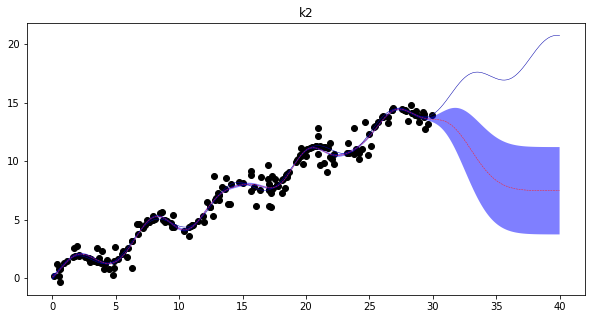

r2 score:  -0.2545672093511111


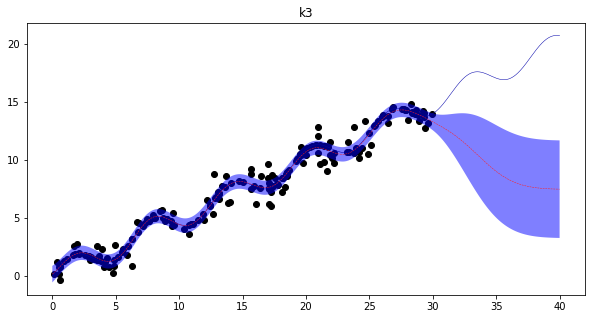

r2 score:  -0.23481199576822265


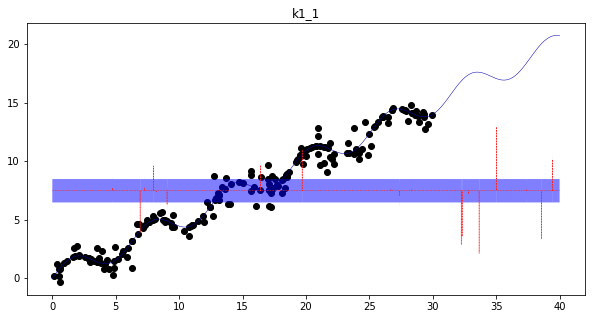

r2 score:  -2594.188310349236


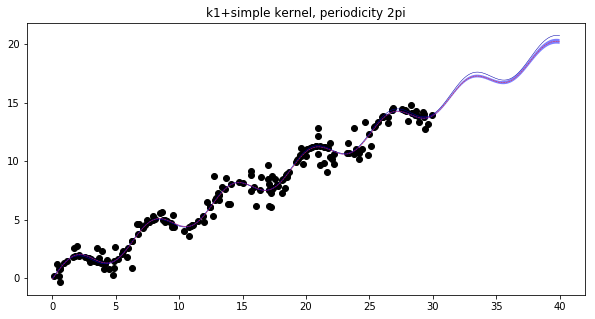

r2 score:  0.9991210811679355


In [84]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import r2_score

def Q1_4():
   
    plt.figure(figsize=(20, 20))

    printPlot(GaussianProcessRegressor(kernel=kernel_simple,normalize_y=True,alpha=0.1), "simple kernel")
    printPlot(GaussianProcessRegressor(kernel=k1,normalize_y=True,alpha=0.1), "k1")
    printPlot(GaussianProcessRegressor(kernel=k2,normalize_y=True,alpha=0.1), "k2")
    printPlot(GaussianProcessRegressor(kernel=k3,normalize_y=True,alpha=0.1), "k3")
    
    return

def Q1_4_2():
   
    plt.figure(figsize=(20, 20))
    printPlot(GaussianProcessRegressor(kernel=kernel_simple2,normalize_y=True,alpha=0.1), "k1_1")
    printPlot(GaussianProcessRegressor(kernel=kernel_simple_k1,normalize_y=True,alpha=0.1), "k1+simple kernel, periodicity 2pi")
    
    return

def printPlot(clf, title):
    clf.fit(X, y)
    y_rbf,sigma = clf.predict(X_plot,return_std=True)
        
    plt.figure(figsize=(10, 5))
    plt.scatter(X, y, c='k', label='Data')
    plt.plot(X_plot, true_y);
    #plt.plot(X[:40], y_rbf[:40]) #take first 40 elements - array[start:stop:step]
    plt.fill(np.concatenate([X_plot, X_plot[::-1]]),
    np.concatenate([y_rbf - sigma,
            (y_rbf + sigma)[::-1]]),
    alpha=.5, fc='b', ec='None')
    plt.plot(X_plot, y_rbf) 
    plt.title(title)
    plt.show()
    #print(clf.score(y_rbf.reshape(-1, 1) , true_y))
    print('r2 score: ',r2_score(y_rbf.reshape(-1, 1) , true_y))
    
Q1_4()

Q1_4_2()

## Bayesian updates (3 points (2+1))

We consider real data about solar radiation measured by a weather balloon:
https://www.openml.org/d/512. We'll use only the raw data (at least the first 1000 points) and try to learn the (very noisy) trend. 

1. Train a Gaussian process on an increasing amount of samples of the training data. Use a simple RBF kernel:
`RBF(10, (1e-2, 1e2))`

 - Start with 10 _random_ samples and plot the predictions (both the mean and the uncertainty interval) for both training and test data, as shown in class. Also compute $R^2$ on the training data.
 - Repeat and 10 more points, retrain and redraw. Do this a couple of times and interpret/explain what you see. 
 
2. Train the Gaussian on the full training set.

 - Plot the predictions (including the uncertainty interval) on the full dataset. Evaluate on the test set using $R^2$ 
 - Interpret the results. Is the kernel right? Is the GP under/overfitting?
 - Try to improve the results by tuning the kernel. Do this either manually or using a small grid/random search.

In [ ]:
# Get the data
balloon_data = oml.datasets.get_dataset(512) # Download Balloon data
X, y = balloon_data.get_data(target=balloon_data.default_target_attribute);

train = X[:1000]
test = X[1000:1500]
X_train = np.array(list(range(1000)))[np.newaxis].T
y_train = X[:1000].reshape(-1, 1)
X_test = np.array(list(range(1000,1500)))[np.newaxis].T
y_test = X[1000:1500].reshape(-1, 1)
X_all = np.array(list(range(1500)))[np.newaxis].T

pd.Series(X[:1500,0]).plot()

## A data mining challenge (4 points)

The goal here is to use everything you have learned to build the best model for a given classification task. We will use two tasks hosted on OpenML, so you will all receive the same cross-validation splits, and your model will be evaluated on the server. The goal is to reasonably select algorithms and hyperparameter settings to obtain the best model. You can also do model selection, pipeline building, and parameter optimization as you have done before. Skeleton code is provided in the OpenML tutorial. You need to optimize the AUROC score (calculated using 10-fold cross0-validation).

- Challenge 1: Detects accents in speech data.

    - The OpenML Task ID is 167132: https://www.openml.org/t/167132
    - The dataset description can be found here: https://www.openml.org/d/40910
    - Leaderboard: https://www.openml.org/t/167132#!people
    
- Challenge 2: Image recognition (CIFAR-10 subsample).

    - The OpenML Task ID is 167133: https://www.openml.org/t/167133
    - The dataset description can be found here: https://www.openml.org/d/40926
    - Leaderboard: https://www.openml.org/t/167133#!people
    - Note that this is a high-dimensional dataset (and not so small). Think carefully about how to run experiments in the  time available.
    
- You are able to see the solutions of others (by clicking in the timeline or run list), so you can learn from prior experiments (what seems to work, how long does it take to train certain models, ...). Resubmission of the exact same solution is not possible.
- You can share one account (one API key) per team. In case you use two, we take the one that performs best.
- Document the different experiments that you ran in this notebook (running them can of course be done outside of the notebook). For each experiment, provide a description of how and why you chose the algorithms and parameters that you submitted. Reason about which experiments to try, don't just do an immense random search.
- Points are rewarded as follows (independently for each task):

    - 1 point for the breadth of experiments you ran (algorithms, pipelines, hyperparameter settings)
    - 1 point for reasoning/insight and interpretation of the results
    - 1 (bonus) point for every team who has uploaded the best solution thus far **on AUC** (who reaches the top of the leaderboard at any moment during the assignment)
        - Exception: simply repeating top models with nearly identical hyperparameters. This will be checked on the timeline.
        - Note: On the leaderboard page, the 'frontier' line is drawn, and your top ranking is also shown in the leaderboard.
        
Note: Report the AUC scores of your best models in your report as well. In case of issues with OpenML we will use the experiments and scores mentioned your report.

In [12]:
from sklearn.model_selection import train_test_split

image_data = oml.datasets.get_dataset(40926) # Download Balloon data
#X, y = image_data.get_data(target=image_data.default_target_attribute);

X, y, attribute_names = image_data.get_data(target=image_data.default_target_attribute, return_attribute_names=True)
# Describe the data with pandas, just to get an overview
#imageframe = pd.DataFrame(X, columns=attribute_names)
#imageframe.describe()
plt.rcParams['savefig.dpi'] = 500 # This controls the size of your figures

X_del, X_split, y_del, y_split = train_test_split(X, y, test_size=0.999)
X_train, X_test, y_train, y_test = train_test_split(X_split, y_split, test_size=0.25)
    
print(X.shape)

(20000, 3072)


Best params:
{'C': 100.0, 'gamma': 5.179474679231202e-10}

Best cross-validation score: 0.34
Test-set score: 0.24
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


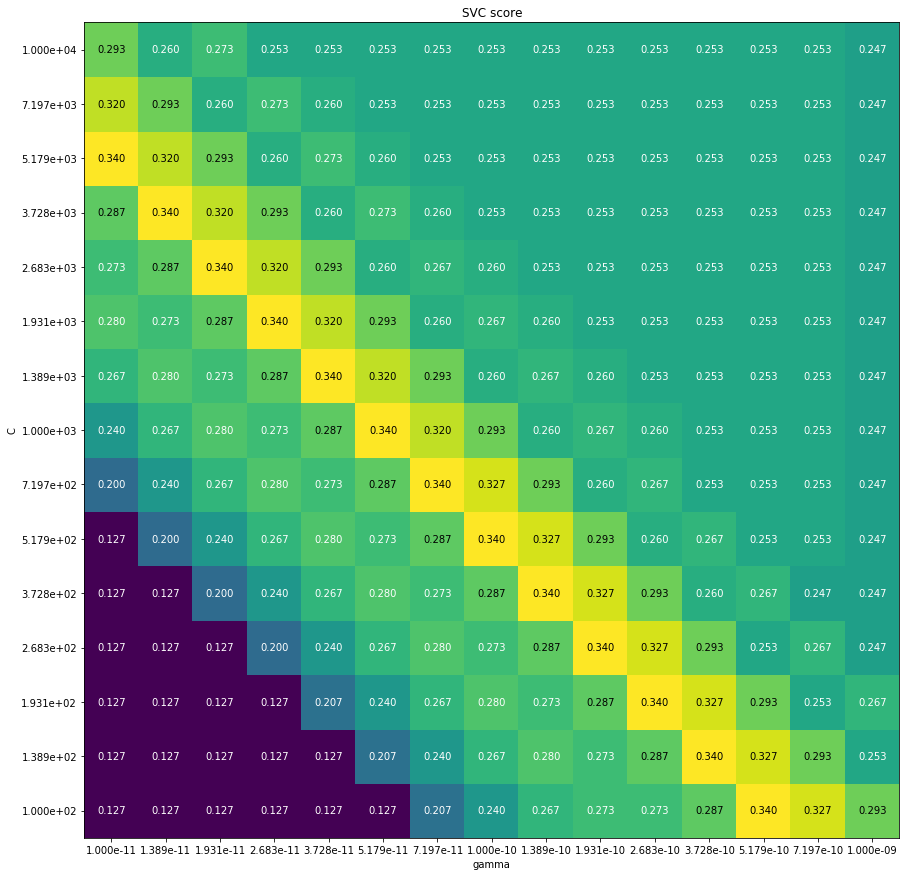

In [10]:
#SVC approach
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV 
from sklearn import svm
from sklearn.model_selection import GridSearchCV, ParameterGrid
import matplotlib

def test_SVC(CA,gammaA):
    p_grid = {"C": CA,
          "gamma": gammaA}
    clf=svm.SVC(kernel='rbf')
    grid = GridSearchCV(clf, param_grid=p_grid, cv=5, n_jobs=7)    
    grid.fit(X_train, y_train)

    results = pd.DataFrame(grid.cv_results_)

    print("Best params:\n{}\n".format(grid.best_params_))
    print("Best cross-validation score: {:.2f}".format(grid.best_score_))
    print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))


    scores = np.array(results.mean_test_score).reshape(len(CA),len(gammaA))

    # plot the mean cross-validation scores
    plt.figure(1, figsize=(15, 15))
    print(p_grid['gamma'])
    print(np.array(map(str,p_grid['gamma'])))
    str1=np.char.mod('%.3e',CA)
    str2=np.char.mod('%.3e',gammaA)
    mglearn.tools.heatmap(scores, ylabel='C', yticklabels=str1,
                      xlabel='gamma', xticklabels=str2, cmap="viridis",fmt="%.3f")
            #matplotlib.ticker.LogFormatterExponent(base=10.0, labelOnlyBase=False, minor_thresholds=None, linthresh=None));
    #plt.ticklabel_format(style='sci')
    ax = plt.gca
    #ax.XData = str(np.array(gammaA),fmt="%.3f")
    plt.title("SVC score")
    
#test_SVC(np.logspace(-15,15,15),np.logspace(-15,15,15)) #rough grid #{'C': 19306.977288832455, 'gamma': 2.6826957952797275e-09} initial grid best result
#test_SVC(np.logspace(2,20,15),np.logspace(-11,-7,15)) # finer grid around promising area #{'C': 100.0, 'gamma': 5.179474679231202e-10} # second grid best  results
test_SVC(np.logspace(2,4,15),np.logspace(-11,-9,15)) # even finer grid around promising area #{'C': 100.0, 'gamma': 5.179474679231202e-10} # third grid best result

In [ ]:
#{'C': 19306.977288832455, 'gamma': 2.6826957952797275e-09} initial grid best result
#{'C': 100.0, 'gamma': 5.179474679231202e-10} # second grid best  results
#{'C': 100.0, 'gamma': 5.179474679231202e-10} # third grid best result
from sklearn.metrics import r2_score

clf=svm.SVC(kernel='rbf', C=100, gamma=5.179474679231202e-10)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('score',clf.score(X_test,y_test))
print('r2 score',r2_score(y_test, y_pred))


In [ ]:
#random forest approach

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def ass4():
    print("starting")
    models = (
                RandomForestClassifier(n_estimators=192, max_features=9),
                RandomForestClassifier(n_estimators=100, max_features=92),
                RandomForestClassifier(n_estimators=134, max_features=9),
                RandomForestClassifier()
                #RandomForestClassifier(n_estimators=378, max_features=189), # too slow
             )
    pipes = []
    fitted_models = []
    
    for clf in models:
        print("making pipeline")
        pipes.append(pipeline.make_pipeline(StandardScaler(), clf))
   
    for pipe in pipes:
        print("fitting")
        fitted_models.append(pipe.fit(X_train, y_train))
    
    print("start: StandardScaler pipeline")
    for clf in fitted_models:
        y_pred = clf.predict(X_test)
        print(clf.score(X_test,y_test))
        print(r2_score(y_test, y_pred))        

    pipes = []
    fitted_models = []
    for clf in models:
        pipes.append(pipeline.make_pipeline(MinMaxScaler(), clf))
   
    for pipe in pipes:
        fitted_models.append(pipe.fit(X_train, y_train))

    print("start: MinMax pipeline")
    for clf in fitted_models:
        y_pred = clf.predict(X_test)
        print(clf.score(X_test,y_test))
        print(r2_score(y_test, y_pred))

    fitted_models = []
    for clf in models:
        fitted_models.append(clf.fit(X_train, y_train))
    
    print("start: no pipeline")
    for clf in fitted_models:
        y_pred = clf.predict(X_test)
        print(clf.score(X_test,y_test))
        print(r2_score(y_test, y_pred))  

ass4()